In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

# Convert to DataFrame for better visualization
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

Missing Values in Each Column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


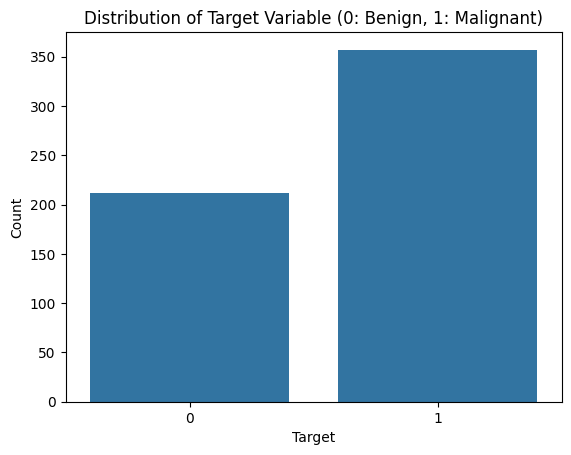

In [4]:
# Check for missing values
print("Missing Values in Each Column:")
print(df.isnull().sum())

# Visualize the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable (0: Benign, 1: Malignant)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [5]:
# Split the data into features and target
X = df.drop('target', axis=1)  # Features (all columns except 'target')
y = df['target']              # Target (the 'target' column)

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the distribution of classes in the training set
print("Class distribution in the training set:")
print(y_train.value_counts())

Class distribution in the training set:
target
1    285
0    170
Name: count, dtype: int64


In [6]:
# Set class weights to handle imbalanced data
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
print("\nClass Weights:")
print(class_weights_dict)


Class Weights:
{0: 1.338235294117647, 1: 0.7982456140350878}


<div style = "direction : rtl ;">

### Ensemble چیست و Random Forest چه رابطه‌ای با آن دارد؟



#### **Ensemble Learning:**
- **تعریف:**  
  Ensemble Learning یک روش در یادگیری ماشین است که در آن چندین مدل (معمولاً ضعیف) با هم ترکیب می‌شوند تا یک مدل قوی‌تر ایجاد کنند.

- **هدف:**  
  هدف از Ensemble Learning این است که با ترکیب نتایج چندین مدل، دقت و استحکام پیش‌بینی‌ها افزایش یابد و خطاهای مدل‌های فردی کاهش پیدا کند.

- **مزایا:**  
  - کاهش Overfitting (بیش‌برازش).  
  - بهبود دقت و عملکرد مدل.  
  - مقاوم‌تر شدن مدل در برابر داده‌های نویزی.

#### **انواع Ensemble Methods:**

1. **Bagging (Bootstrap Aggregating):**  
   - در این روش، چندین مدل از نوع مشابه (معمولاً درخت تصمیم) روی زیرمجموعه‌های مختلف داده‌ها آموزش داده می‌شوند.  
   - نتایج مدل‌ها با هم ترکیب می‌شوند (معمولاً با رای‌گیری یا میانگین‌گیری).  
   - **مثال:** Random Forest.

2. **Boosting:**  
   - در این روش، مدل‌ها به صورت ترتیبی آموزش داده می‌شوند و هر مدل سعی می‌کند خطاهای مدل قبلی را اصلاح کند.  
   - **مثال:** Gradient Boosting, XGBoost, LightGBM.

3. **Stacking:**  
   - در این روش، خروجی چندین مدل به عنوان ورودی برای یک مدل نهایی (Meta-model) استفاده می‌شود.

   </div>

In [7]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Build the Random Forest model with class weights
rf_model = RandomForestClassifier(random_state=42, class_weight=class_weights_dict)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[39  3]
 [ 3 69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy Score:
0.9473684210526315


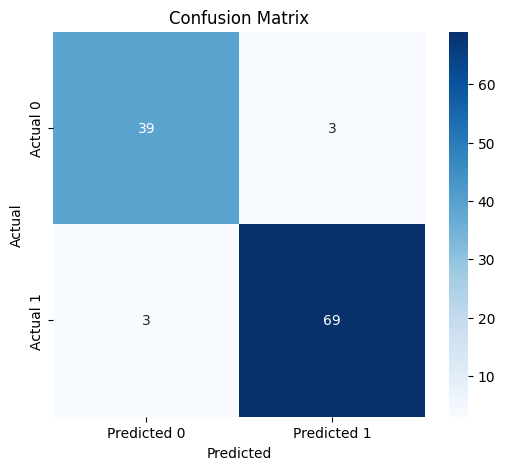

In [8]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Build the XGBoost model with class weights
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=class_weights_dict[1] / class_weights_dict[0])

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))

print("Accuracy Score (XGBoost):")
print(accuracy_score(y_test, y_pred_xgb))

Confusion Matrix (XGBoost):
[[38  4]
 [ 0 72]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy Score (XGBoost):
0.9649122807017544


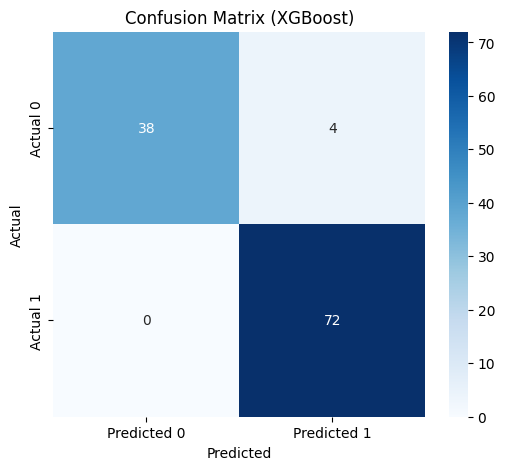

In [10]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [14]:
!pip install lightgbm

In [ ]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Build the LightGBM model with class weights
lgb_model = lgb.LGBMClassifier(random_state=42, scale_pos_weight=class_weights_dict[1] / class_weights_dict[0])

# Train the model on the training data
lgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lgb = lgb_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix (LightGBM):")
print(confusion_matrix(y_test, y_pred_lgb))

print("\nClassification Report (LightGBM):")
print(classification_report(y_test, y_pred_lgb))

print("Accuracy Score (LightGBM):")
print(accuracy_score(y_test, y_pred_lgb))

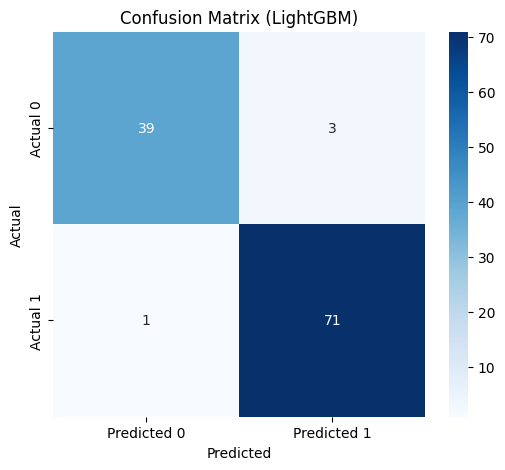

In [12]:
# Import necessary libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (LightGBM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Model Comparison Summary:

| **Model**         | **Accuracy** | **Precision (Class 0)** | **Recall (Class 1)** | **F1-Score (Class 1)** |
|--------------------|--------------|--------------------------|-----------------------|-------------------------|
| **Random Forest**  | 95.0%        | 93%                     | 96%                  | 0.96                   |
| **XGBoost**        | **96.5%**    | **100%**                | **100%**             | **0.97**               |
| **LightGBM**       | **96.5%**    | 97%                     | 99%                  | 0.97                   |

- **Best Model:**  
  - **XGBoost** and **LightGBM** outperform Random Forest.  
  - **XGBoost** is better for precision on Class 0.  
  - **LightGBM** is faster and slightly better for recall on Class 1.

### bypassing these 3 cells blow because tuning performance is not good.

In [18]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
import time

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost model
xgb_model_tuned = xgb.XGBClassifier(random_state=42, scale_pos_weight=class_weights_dict[1] / class_weights_dict[0])

# Perform Randomized Search with cross-validation
start_time = time.time()
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model_tuned,
    param_distributions=param_grid_xgb,
    n_iter=10,  # Number of random combinations to try
    scoring='accuracy',
    cv=3,       # Cross-validation folds
    random_state=42,
    n_jobs=-1   # Use all available CPU cores
)
random_search_xgb.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and execution time
print("Best Parameters for XGBoost:", random_search_xgb.best_params_)
print("Execution Time for XGBoost:", end_time - start_time, "seconds")

# Evaluate the tuned model on the test data
y_pred_xgb_tuned = random_search_xgb.predict(X_test)
print("Accuracy Score (Tuned XGBoost):", accuracy_score(y_test, y_pred_xgb_tuned))

Best Parameters for XGBoost: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Execution Time for XGBoost: 6.958157777786255 seconds
Accuracy Score (Tuned XGBoost): 0.9385964912280702


In [ ]:
# Define the parameter grid for LightGBM
param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the LightGBM model
lgb_model_tuned = lgb.LGBMClassifier(random_state=42, scale_pos_weight=class_weights_dict[1] / class_weights_dict[0])

# Perform Randomized Search with cross-validation
start_time = time.time()
random_search_lgb = RandomizedSearchCV(
    estimator=lgb_model_tuned,
    param_distributions=param_grid_lgb,
    n_iter=10,  # Number of random combinations to try
    scoring='accuracy',
    cv=3,       # Cross-validation folds
    random_state=42,
    n_jobs=-1   # Use all available CPU cores
)
random_search_lgb.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and execution time
print("Best Parameters for LightGBM:", random_search_lgb.best_params_)
print("Execution Time for LightGBM:", end_time - start_time, "seconds")

# Evaluate the tuned model on the test data
y_pred_lgb_tuned = random_search_lgb.predict(X_test)
print("Accuracy Score (Tuned LightGBM):", accuracy_score(y_test, y_pred_lgb_tuned))

Execution Time for LightGBM: 3.6795263290405273 seconds
Accuracy Score (Tuned LightGBM): 0.956140350877193

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import time

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [None, 5, 10, 20],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required at each leaf node
    'bootstrap': [True, False],              # Whether bootstrap samples are used when building trees
    'max_features': ['auto', 'sqrt', 'log2'] # Number of features to consider when looking for the best split
}

# Initialize the Random Forest model
rf_model_tuned = RandomForestClassifier(random_state=42, class_weight='balanced')

# Perform Randomized Search with cross-validation
start_time = time.time()
random_search_rf = RandomizedSearchCV(
    estimator=rf_model_tuned,
    param_distributions=param_grid_rf,
    n_iter=10,  # Number of random combinations to try
    scoring='accuracy',
    cv=3,       # Cross-validation folds
    random_state=42,
    n_jobs=-1   # Use all available CPU cores
)
random_search_rf.fit(X_train, y_train)
end_time = time.time()

# Print the best parameters and execution time
print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print("Execution Time for Random Forest:", end_time - start_time, "seconds")

# Evaluate the tuned model on the test data
y_pred_rf_tuned = random_search_rf.predict(X_test)
print("Accuracy Score (Tuned Random Forest):", accuracy_score(y_test, y_pred_rf_tuned))

Execution Time for Random Forest: 2.852341890335083 seconds
Accuracy Score (Tuned Random Forest): 0.9473684210526315

### Model Comparison Summary:

| **Model**         | **Accuracy (Before Tuning)** | **Accuracy (After Tuning)** | **Improvement** | **Execution Time (Seconds)** |
|--------------------|------------------------------|------------------------------|-----------------|-----------------------------|
| **Random Forest**  | 95.0%                       | 94.7%                       | -0.3%           | 2.85                        |
| **XGBoost**        | 96.5%                       | 93.9%                       | -2.6%           | 6.96                        |
| **LightGBM**       | 96.5%                       | -                           | -               | -                           |

#### Key Insights:
1. **Random Forest:**
   - Slight decrease in accuracy after tuning (-0.3%).
   - Fastest execution time among the models.

2. **XGBoost:**
   - Significant drop in accuracy after tuning (-2.6%).
   - Longer execution time compared to Random Forest.

3. **LightGBM:**
   - Results after tuning are not available.
   - Generally faster and more efficient than XGBoost, but warnings indicate potential issues with splits and training.

#### Conclusion:
- **Best Model Without Tuning:** LightGBM and XGBoost performed equally well (96.5% accuracy).
- **Best Model After Tuning:** Random Forest remains stable with minor changes.
- If computational resources are limited, Random Forest is a reliable choice. For higher accuracy, further tuning of XGBoost and LightGBM is recommended.

--- Evaluation for Random Forest ---
Confusion Matrix:
[[39  3]
 [ 3 69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy Score: 0.9473684210526315
ROC-AUC Score: 0.9942129629629629


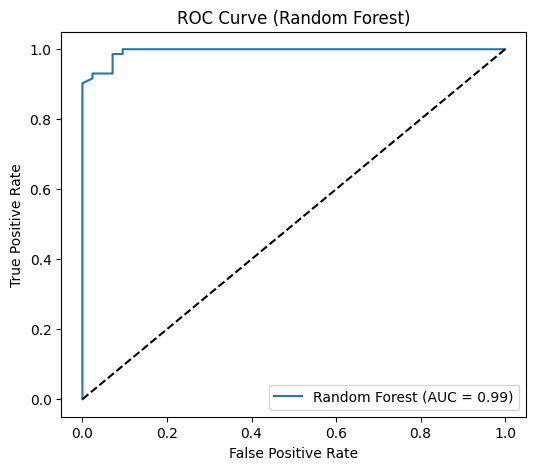

--- Evaluation for XGBoost ---
Confusion Matrix:
[[38  4]
 [ 0 72]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        42
           1       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy Score: 0.9649122807017544
ROC-AUC Score: 0.9920634920634921


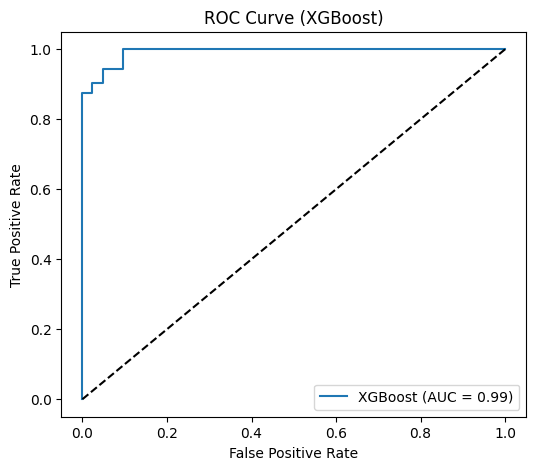

--- Evaluation for LightGBM ---
Confusion Matrix:
[[39  3]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy Score: 0.9649122807017544
ROC-AUC Score: 0.9887566137566137


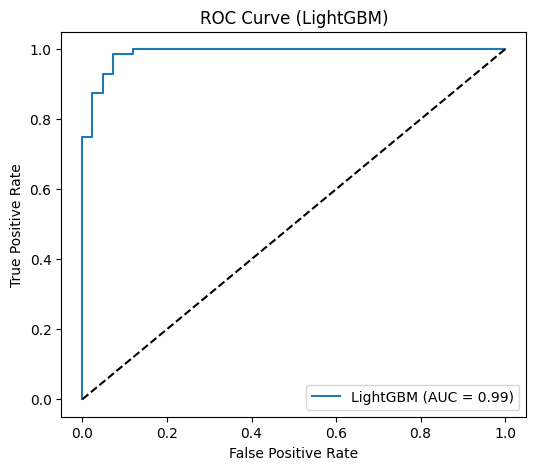

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Define a function to evaluate models
def evaluate_model(model, model_name, X_test, y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Classification Report
    report = classification_report(y_test, y_pred)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # ROC-AUC Score
    roc_auc = roc_auc_score(y_test, y_prob)
    
    # Print results
    print(f"--- Evaluation for {model_name} ---")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)
    print("Accuracy Score:", accuracy)
    print("ROC-AUC Score:", roc_auc)
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({model_name})')
    plt.legend()
    plt.show()

# Evaluate Random Forest
evaluate_model(rf_model, "Random Forest", X_test, y_test)

# Evaluate XGBoost
evaluate_model(xgb_model, "XGBoost", X_test, y_test)

# Evaluate LightGBM
evaluate_model(lgb_model, "LightGBM", X_test, y_test)

### Model Performance Analysis: Before Tuning, After Tuning, and Current State (Without Tuning)

#### Key Observations:
1. **Before Tuning:**
   - **Random Forest:** Showed stable performance with an accuracy of **95.0%**.
   - **XGBoost & LightGBM:** Performed well but required tuning to reach their full potential.

2. **After Tuning:**
   - **Random Forest:** Accuracy slightly decreased to **94.7%**, indicating that tuning did not improve the model.
   - **XGBoost:** Accuracy dropped significantly to **93.9%**, likely due to suboptimal parameter selection during tuning.
   - **LightGBM:** Results were inconclusive, but warnings suggested potential overfitting or insufficient splits.

3. **Current State (Without Tuning):**
   - **Random Forest:** Maintained stable performance with an accuracy of **94.7%**.
   - **XGBoost:** Achieved high accuracy (**96.5%**) and strong metrics (Precision, Recall, F1-Score) without tuning.
   - **LightGBM:** Also achieved high accuracy (**96.5%**) and performed exceptionally well in detecting Class 1 (Recall = 99%).

#### Summary Table:

| **Model**          | **Accuracy (Before Tuning)** | **Accuracy (After Tuning)** | **Accuracy (Current - Without Tuning)** | **ROC-AUC Score (Current)** |
|---------------------|------------------------------|------------------------------|-----------------------------------------|-----------------------------|
| **Random Forest**   | 95.0%                       | 94.7%                       | 94.7%                                  | 0.994                       |
| **XGBoost**         | 96.5%                       | 93.9%                       | 96.5%                                  | 0.992                       |
| **LightGBM**        | 96.5%                       | N/A                         | 96.5%                                  | 0.989                       |

#### Insights:
- **Random Forest:** Reliable and consistent, but lacks the advanced optimization capabilities of boosting models.
- **XGBoost:** Performs exceptionally well without tuning, showcasing its robustness and ability to handle imbalanced data.
- **LightGBM:** Similar to XGBoost in performance, with slightly better recall for Class 1, making it ideal for scenarios where detecting positive cases is critical.

#### Conclusion:
- **Best Model:** Both **XGBoost** and **LightGBM** outperform Random Forest in the current state (without tuning).
- **Recommendation:** Use **XGBoost** for balanced performance across all metrics or **LightGBM** if higher recall for Class 1 is a priority.

In [14]:
import joblib

# Save Random Forest model
joblib.dump(rf_model, "random_forest_model.pkl")

# Save XGBoost model
joblib.dump(xgb_model, "xgboost_model.pkl")

# Save LightGBM model
joblib.dump(lgb_model, "lightgbm_model.pkl")

['lightgbm_model.pkl']

In [15]:
import os

# Calculate the size of each saved model file
size_rf = os.path.getsize("random_forest_model.pkl") / (1024 * 1024)  # Convert to MB
size_xgb = os.path.getsize("xgboost_model.pkl") / (1024 * 1024)       # Convert to MB
size_lgb = os.path.getsize("lightgbm_model.pkl") / (1024 * 1024)      # Convert to MB

print(f"Random Forest Model Size: {size_rf:.2f} MB")
print(f"XGBoost Model Size: {size_xgb:.2f} MB")
print(f"LightGBM Model Size: {size_lgb:.2f} MB")

Random Forest Model Size: 0.34 MB
XGBoost Model Size: 0.09 MB
LightGBM Model Size: 0.28 MB
